In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

load dataset

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data # Features
y = iris.target # Labels

node distance calculation functions (copied from knn model implementation)

In [28]:
def euclidean_distance(point_1, point_2):
    point_sum = np.sum( (point_1-point_2) **2)
    return np.sqrt(point_sum)

In [29]:
# Helper functions:
def centroid_distance(data_point, centroids): # modfied k=1 KNN model
    distances = []
    for c in centroids.keys(): # for each cluster 
        # store (distance, cluster_num)
        distances.append((euclidean_distance(data_point, centroids[c]), c))
    # sort by distances
    distances.sort(key=lambda x: x[0])

    # extract cluster num from least distance
    closest_cluster = distances[0][1]
    return closest_cluster

def initial_centroids(k, x_test):
    current_centroids = {}
    used_randoms = set()
    for i in range(1,k+1):
        while True:
            random_point = random.randint(0,len(x_test)-1)
            if random_point not in used_randoms:
                used_randoms.add(random_point)
                break
        current_centroids[i] = x_test[random_point]
    return current_centroids


In [30]:
# Split into train/test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

k = 3 # choose k (num of clusters)
current_centroids = initial_centroids(k, x_test) # place initial random centroids
iterations = 0
while True:
    iterations += 1
    # create k clusters by assigning each point to closest centroid
    clusters = { x:[] for x in range(1, k+1)}

    # for each data point:
    for i in range(len(x_test)):
       # add data point to closest cluster
       matching_cluster = centroid_distance(x_test[i], current_centroids)
       clusters[matching_cluster].append(x_test[i])

    # compute k new centroids by averaging poitns in each cluster
    new_centroids = {}
    for k,v in clusters.items():
        centroid = np.mean(v, axis=0)
        new_centroids[k] = centroid 

    # if centroids are same as previous centroids:
    if all(np.allclose(current_centroids[k], new_centroids[k], atol=1e-4) for k in current_centroids):
        print("algorithm has converged at iteration: ", iterations)
        # algorithm has converged. plot results and exit.
        result = clusters
        break
    
    current_centroids = new_centroids # update centroids and continue loop

algorithm has converged at iteration:  3


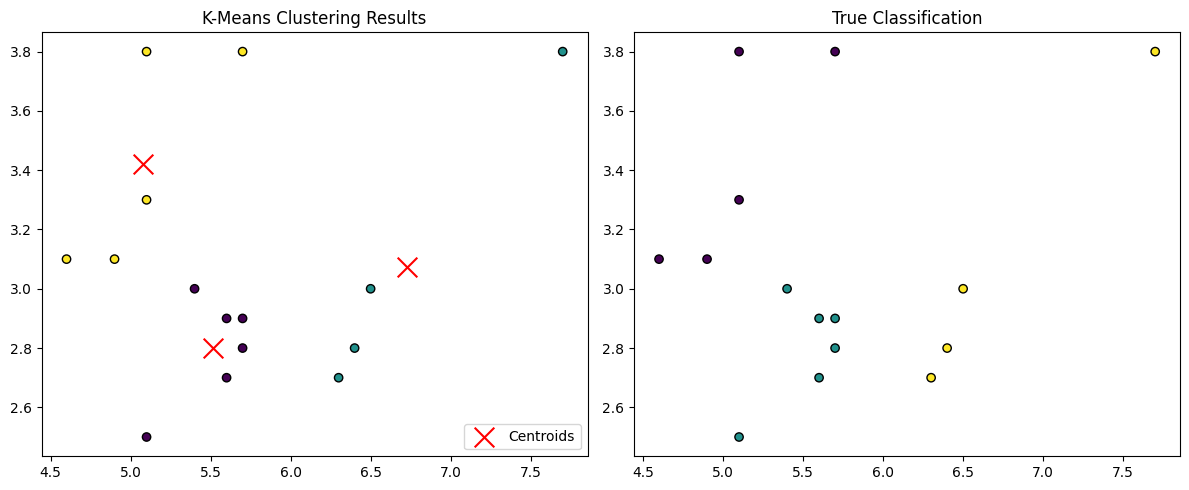

In [31]:
%matplotlib inline
all_points, all_labels = [], []

for cluster_id, data in clusters.items():
    for point in data:
        all_points.append(point)  
        all_labels.append(cluster_id)

all_points = np.array(all_points)
all_labels = np.array(all_labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Scatter plot colored by cluster assignments
axes[0].scatter(all_points[:, 0], all_points[:, 1], c=all_labels, cmap='viridis', edgecolors='k')
centroid_points = np.array(list(current_centroids.values()))
axes[0].scatter(centroid_points[:, 0], centroid_points[:, 1], c='red', marker='x', s=200, label="Centroids")
axes[0].set_title("K-Means Clustering Results")
axes[0].legend()

# Second subplot - the actual classifications
axes[1].scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis', edgecolors='k')
axes[1].set_title("True Classification")

# Show both plots in the same figure
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()